In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [ ]:
#Setting seed for reproducability
np.random.seed(10)

In [ ]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [ ]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [ ]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


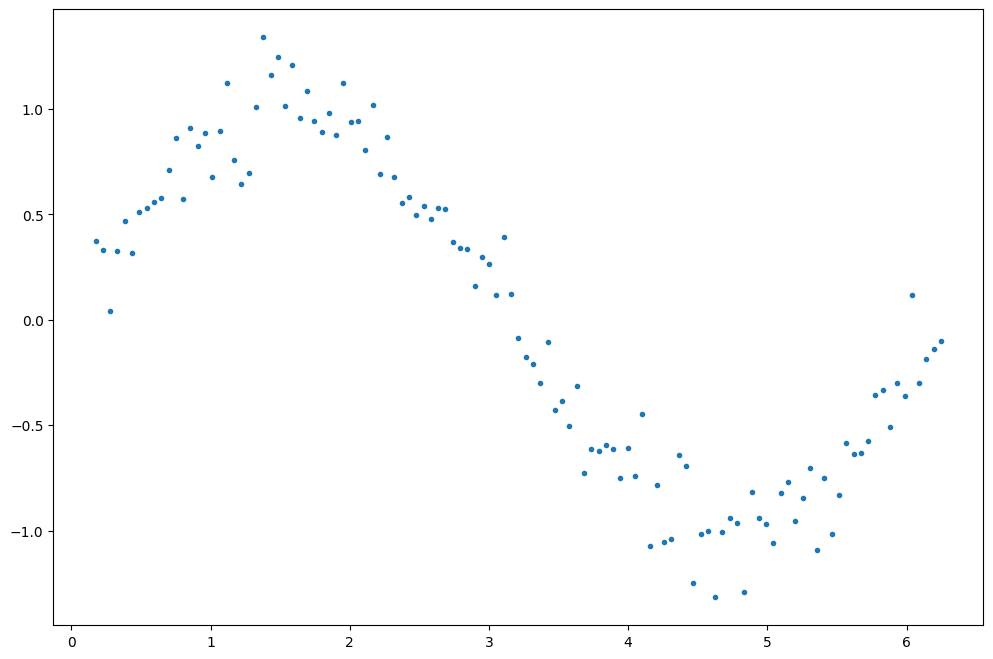

In [ ]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [ ]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating test and train Set Randomly

In [ ]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [ ]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Training Error 0.2131443095817389
Testing Error 0.18974033118165395


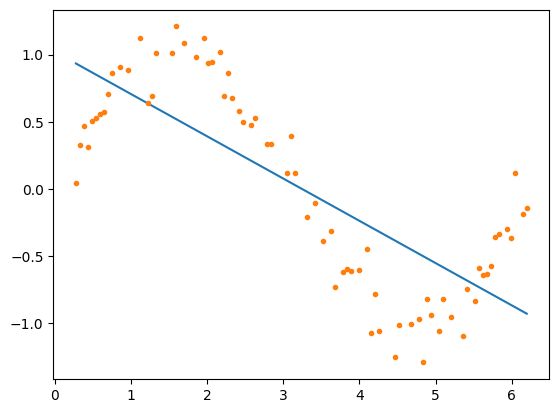

In [ ]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]
X_train_scaled = scaler.fit_transform(independent_variable_train)
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:1]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [ ]:
scaler = StandardScaler()

Training Error 0.02147248177096571
Testing Error 0.030451878881969232


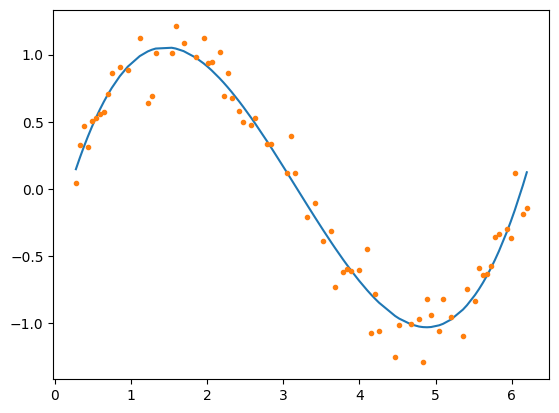

In [ ]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]
X_train_scaled = scaler.fit_transform(independent_variable_train)

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:3]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [ ]:
scaler = StandardScaler()

Training Error 0.018764347745704197
Testing Error 0.032176445721772924


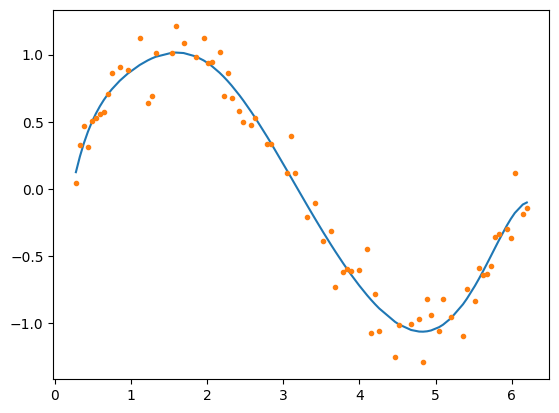

In [ ]:
#Linear regression with Seven features
independent_variable_train = X_train[:,0:9]
X_train_scaled = scaler.fit_transform(independent_variable_train)

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:9]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [ ]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
    #Loading the scaler
    scaler = StandardScaler()

    #Fit the model
    linreg = LinearRegression()
    train_x_scaled = scaler.fit_transform(train_x)
    linreg.fit(train_x_scaled,train_y)
    train_y_pred = linreg.predict(train_x_scaled)
    test_x_scaled = scaler.transform(test_x)
    test_y_pred = linreg.predict(test_x_scaled)

    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x_scaled[:,0:1],train_y_pred)

        plt.plot(train_x_scaled[:,0:1],train_y,'.')

        plt.title('Number of Predictors: %d'%features)

    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x_scaled.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x_scaled.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret

In [ ]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

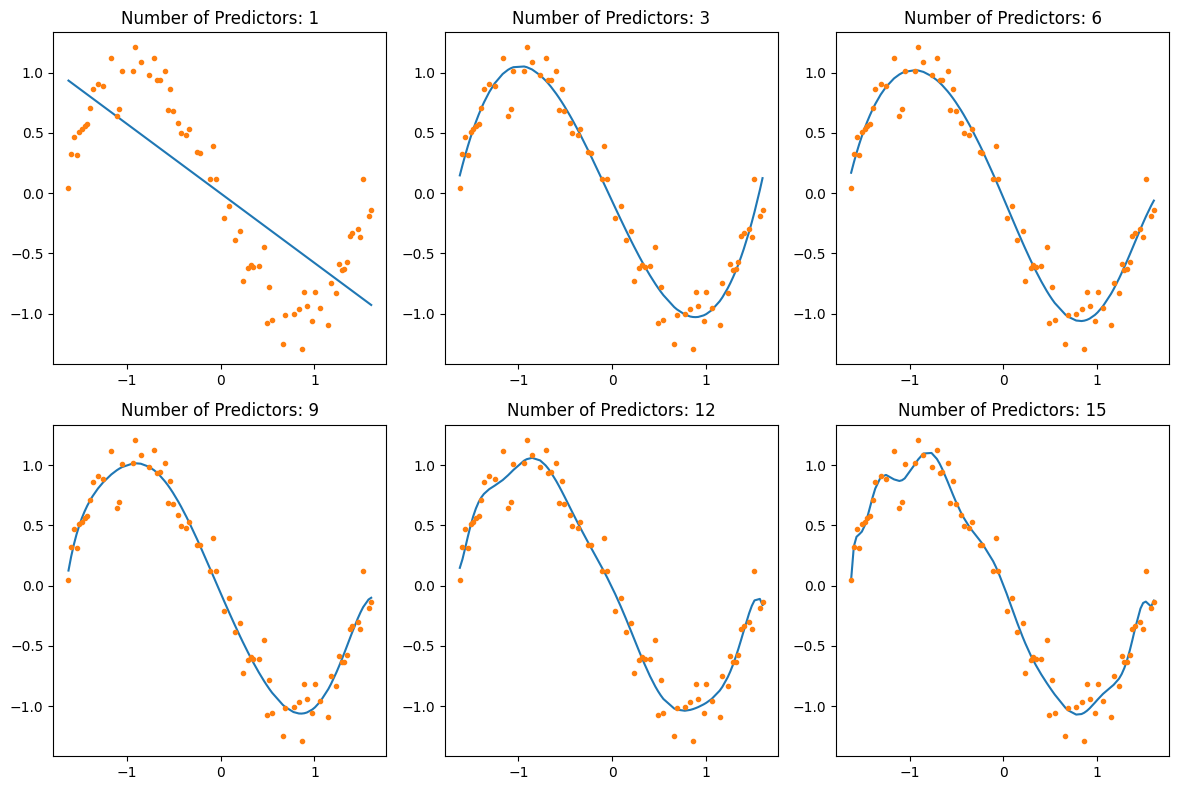

In [ ]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,-0.003,-0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,-0.003,-0.72,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.003,4,-12,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.003,4.2,-13,8.5,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.003,2.2,0.1,-21,30,-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.003,4.5,-20,48,-85,80,-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.003,4.3,-18,39,-64,53,-10,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.003,9.3,-85,4.4e+02,-1.3e+03,2.4e+03,-2.4e+03,1.3e+03,-3.1e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.003,10,-1e+02,5.6e+02,-1.8e+03,3.6e+03,-4.2e+03,2.9e+03,-1.1e+03,1.6e+02,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-0.003,30,-4.6e+02,3.6e+03,-1.7e+04,4.8e+04,-9e+04,1.1e+05,-8.1e+04,3.4e+04,-6.3e+03,NaN,NaN,NaN,NaN,NaN


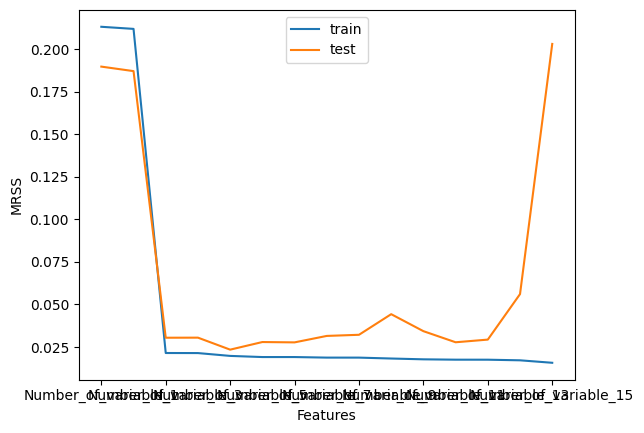

In [ ]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])